In [1]:
import os

import pandas as pd
pd.options.mode.chained_assignment = None

from PIL import Image

import numpy as np

from matplotlib import pyplot as plt

import cv2

In [2]:
# Constants

SOURCE_PATH = 'data/TrafficSigns'
FILENAME = 'Train.csv'
DESTINATION_PATH = 'ProcessedData/TrafficSign'
DESTINATION_IMGS = 'ProcessedData/TrafficSign/Images'

In [3]:
for i in range(43):
    for img in os.listdir(os.path.join(DESTINATION_IMGS, str(i))):
        os.remove(os.path.join(DESTINATION_IMGS, str(i), img))
    os.rmdir(os.path.join(DESTINATION_IMGS, str(i)))

In [4]:
sign_annotations = pd.read_csv(os.path.join(SOURCE_PATH, FILENAME))

In [5]:
sign_annotations = sign_annotations.drop_duplicates(subset = ['Path'], ignore_index=True)

In [6]:
sign_annotations

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,27,26,5,5,22,20,20,Train/20/00020_00000_00000.png
1,28,27,5,6,23,22,20,Train/20/00020_00000_00001.png
2,29,26,6,5,24,21,20,Train/20/00020_00000_00002.png
3,28,27,5,6,23,22,20,Train/20/00020_00000_00003.png
4,28,26,5,5,23,21,20,Train/20/00020_00000_00004.png
...,...,...,...,...,...,...,...,...
39204,52,56,5,6,47,51,42,Train/42/00042_00007_00025.png
39205,56,58,5,5,51,53,42,Train/42/00042_00007_00026.png
39206,58,62,5,6,53,57,42,Train/42/00042_00007_00027.png
39207,63,69,5,7,58,63,42,Train/42/00042_00007_00028.png


In [7]:
def changeFilename(x):
    filename = x.Path
    return SOURCE_PATH + '/' + filename
    
sign_annotations['Path'] = sign_annotations.apply(changeFilename,axis=1)

In [8]:
sign_annotations

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,27,26,5,5,22,20,20,data/TrafficSigns/Train/20/00020_00000_00000.png
1,28,27,5,6,23,22,20,data/TrafficSigns/Train/20/00020_00000_00001.png
2,29,26,6,5,24,21,20,data/TrafficSigns/Train/20/00020_00000_00002.png
3,28,27,5,6,23,22,20,data/TrafficSigns/Train/20/00020_00000_00003.png
4,28,26,5,5,23,21,20,data/TrafficSigns/Train/20/00020_00000_00004.png
...,...,...,...,...,...,...,...,...
39204,52,56,5,6,47,51,42,data/TrafficSigns/Train/42/00042_00007_00025.png
39205,56,58,5,5,51,53,42,data/TrafficSigns/Train/42/00042_00007_00026.png
39206,58,62,5,6,53,57,42,data/TrafficSigns/Train/42/00042_00007_00027.png
39207,63,69,5,7,58,63,42,data/TrafficSigns/Train/42/00042_00007_00028.png


In [9]:
sign_annotations.groupby(['ClassId']).agg(['count'])

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,Path
,count,count,count,count,count,count,count
ClassId,,,,,,,
0,210,210,210,210,210,210,210
1,2220,2220,2220,2220,2220,2220,2220
2,2250,2250,2250,2250,2250,2250,2250
3,1410,1410,1410,1410,1410,1410,1410
4,1980,1980,1980,1980,1980,1980,1980
5,1860,1860,1860,1860,1860,1860,1860
6,420,420,420,420,420,420,420
7,1440,1440,1440,1440,1440,1440,1440


In [10]:
balanced_df = sign_annotations.groupby(['ClassId']).apply(lambda x:x.sample(200)).reset_index(drop=True)

In [11]:
balanced_df

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,32,29,6,5,27,24,0,data/TrafficSigns/Train/0/00000_00005_00006.png
1,38,39,5,6,32,33,0,data/TrafficSigns/Train/0/00000_00003_00013.png
2,47,48,6,6,42,42,0,data/TrafficSigns/Train/0/00000_00000_00017.png
3,40,39,6,5,35,34,0,data/TrafficSigns/Train/0/00000_00003_00014.png
4,41,42,6,6,35,37,0,data/TrafficSigns/Train/0/00000_00006_00007.png
...,...,...,...,...,...,...,...,...
8595,36,35,6,5,31,30,42,data/TrafficSigns/Train/42/00042_00004_00009.png
8596,35,37,5,6,30,32,42,data/TrafficSigns/Train/42/00042_00001_00011.png
8597,30,29,6,5,25,24,42,data/TrafficSigns/Train/42/00042_00002_00006.png
8598,29,27,6,6,23,22,42,data/TrafficSigns/Train/42/00042_00003_00002.png


In [12]:
balanced_df.groupby(['ClassId']).agg(['count'])

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,Path
,count,count,count,count,count,count,count
ClassId,,,,,,,
0,200,200,200,200,200,200,200
1,200,200,200,200,200,200,200
2,200,200,200,200,200,200,200
3,200,200,200,200,200,200,200
4,200,200,200,200,200,200,200
5,200,200,200,200,200,200,200
6,200,200,200,200,200,200,200
7,200,200,200,200,200,200,200


In [13]:
Categories = balanced_df['ClassId'].unique()

In [14]:
Categories

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42], dtype=int64)

In [15]:
for category in Categories:
    os.mkdir(os.path.join(DESTINATION_IMGS, str(category)))

In [16]:
for idx, row in balanced_df.iterrows():
    
    image = Image.open(row['Path'])
    image.save(os.path.join(DESTINATION_IMGS, str(row['ClassId']), row['Path'].split('/')[-1]))

In [17]:
def updatePath(x):
    filename = x.Path.split('/')[-1]
    classID = x.ClassId
    return DESTINATION_IMGS + '/' + str(classID) + '/' + filename
    
balanced_df['Path'] = balanced_df.apply(updatePath,axis=1)

In [18]:
balanced_df

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,32,29,6,5,27,24,0,ProcessedData/TrafficSign/Images/0/00000_00005...
1,38,39,5,6,32,33,0,ProcessedData/TrafficSign/Images/0/00000_00003...
2,47,48,6,6,42,42,0,ProcessedData/TrafficSign/Images/0/00000_00000...
3,40,39,6,5,35,34,0,ProcessedData/TrafficSign/Images/0/00000_00003...
4,41,42,6,6,35,37,0,ProcessedData/TrafficSign/Images/0/00000_00006...
...,...,...,...,...,...,...,...,...
8595,36,35,6,5,31,30,42,ProcessedData/TrafficSign/Images/42/00042_0000...
8596,35,37,5,6,30,32,42,ProcessedData/TrafficSign/Images/42/00042_0000...
8597,30,29,6,5,25,24,42,ProcessedData/TrafficSign/Images/42/00042_0000...
8598,29,27,6,6,23,22,42,ProcessedData/TrafficSign/Images/42/00042_0000...


In [19]:
sign_annos = balanced_df

In [20]:
sign_annos = sign_annos.sample(frac=1).reset_index(drop=True)

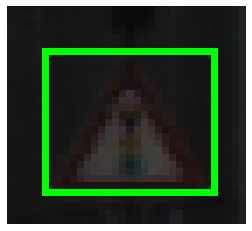

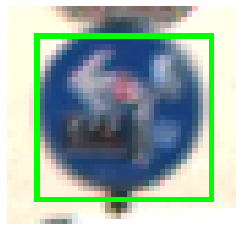

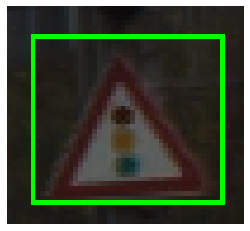

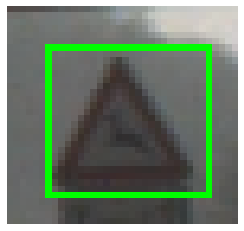

In [21]:
for idx, row in sign_annos.iterrows():
    
    im = cv2.imread(row['Path'])
    im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
    img_data = np.copy(im)
    pts1 = (row['Roi.X1'], row['Roi.Y1'])
    pts2 = (row['Roi.X2'], row['Roi.Y2'])    
    img_data = cv2.rectangle(img_data, pts1, pts2, (0, 255, 0), thickness = 1)
    plt.imshow(img_data)
    plt.axis('off') 
    plt.show()
    if idx == 3:
        break

In [22]:
if os.path.exists(os.path.join(DESTINATION_PATH, 'frameAnnotationsBOX.csv')):
    os.remove(os.path.join(DESTINATION_PATH, 'frameAnnotationsBOX.csv'))

sign_annos.to_csv(os.path.join(DESTINATION_PATH, 'frameAnnotationsBOX.csv'), index = False)